In [3]:

import cv2
from PIL import Image, ImageDraw, ImageFont, ImageTransform
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from tqdm import tqdm
from glob import glob
import sys

import os
from configparser import ConfigParser
path_config_file = os.getcwd().split('docrv2_sroie')[0] + 'docrv2_sroie/' + 'config.ini'
common_variable = ConfigParser()
common_variable.read(path_config_file)
print(common_variable.sections())
print(common_variable['database']['module_path'])
sys.path.append(common_variable['database']['module_path'])
from db_util import *
from db import *
from random import choice

['database', 'mlflow', 'font']
/home/dk/docrv2_sroie/modules/database/


In [4]:
# set simulator parameter
imageSize = (256, 128)
fontsSize = (10,30)

In [6]:
# apply cycleGAN later here
path = '/home/dk/docrv2_sroie/DB/'
name = 'denoise_test_100'
db_data = open_env(path+name)
img_raw = read_bulk_data_from_db(db_data,'img')
imgs = []
for idx in range(0,len(img_raw),2):
    imgs.append(img_raw[idx])


In [7]:
# some generator
def make_batch_image(imgs, batch_size):
    numImages = len(imgs)
    numbatch = int(np.ceil(numImages/batch_size))
    imgsize = imgs[0].size

    batchImages = np.zeros((batch_size,imgsize[1],imgsize[0],3), dtype=np.uint8)
    bidx = 0
    for img in imgs:
        if bidx == batch_size:
            batchImages = np.zeros((batch_size,imgsize[1],imgsize[0],3), dtype=np.uint8)
            bidx = 0
        batchImages[bidx,:] = np.array(img, dtype=np.uint8)
        bidx = bidx + 1
        if bidx == batch_size:
            yield batchImages
        

In [77]:
batch_size = 10
numImages = len(imgs)
numbatch = int(np.ceil(numImages/batch_size))
batchgen = make_batch_image(imgs, batch_size)
for cidx in range(numbatch):
    batchim = next(batchgen)
    # apply cyclegan
    
    # save image to db
    

(10, 128, 256, 3)

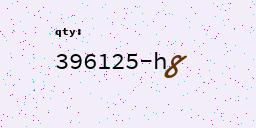